<a href="https://colab.research.google.com/github/SaanviDhakane29/SKILL-BML-PYTHON-/blob/main/BML_expt9(pca).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
df=pd.read_csv("/content/drive/MyDrive/winequality-white.csv" ,sep=';', quotechar='"')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

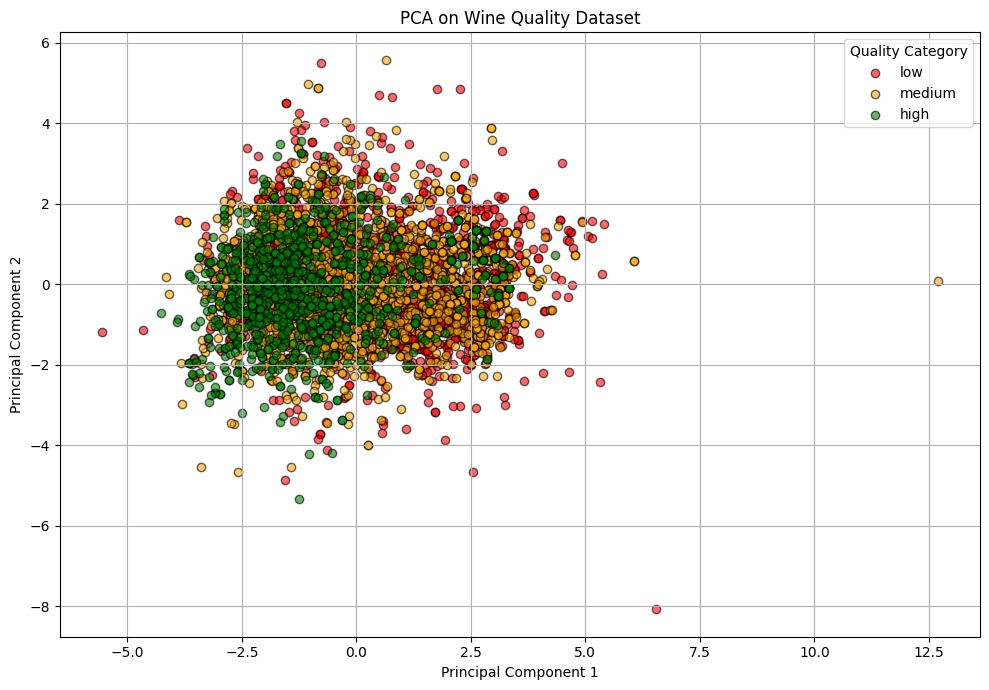

Explained variance ratio: [0.29293217 0.14320363]


In [8]:
X = df.drop('quality', axis=1)
y = df['quality']
# Convert to categories: low (3–5), medium (6), high (7–9)
def quality_category(score):
    if score <= 5:
        return 'low'
    elif score == 6:
        return 'medium'
    else:
        return 'high'

y_cat = df['quality'].apply(quality_category)
y_cat = y.apply(quality_category)

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['quality'] = y_cat  # use categorical quality

# Step 6: Plot the PCA result
plt.figure(figsize=(10, 7))
colors = {'low': 'red', 'medium': 'orange', 'high': 'green'}

for category in ['low', 'medium', 'high']:
    subset = pca_df[pca_df['quality'] == category]
    plt.scatter(subset['PC1'], subset['PC2'],
                c=colors[category],
                label=category, alpha=0.6, edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Quality Dataset')
plt.legend(title='Quality Category')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

